In [ ]:
import numpy as np
import pandas as pd

In [10]:
def data_info(data):
    cols = (data.columns).tolist()
    print(f"Data info: {len(data)} rows x {len(cols)} columns")
    for idx, col in enumerate(cols):
        print(f"{idx}: {col}")
    return data, cols

def cols_setting(cols):
    drop_idx = input('Drop indexes: ')
    if drop_idx == "":
        drop_idx = []
    else:
        drop_idx = list(map(int, drop_idx.split(',')))
    label_idx = int(input('Label index: '))

    if label_idx < 0 or label_idx >= len(cols):
        print("Invalid label index!")
        return None, None

    drop_idx.append(label_idx)
    
    for idx in sorted(drop_idx, reverse=True):
        if idx == label_idx:
            label_col = cols[idx]
        del cols[idx]  

    return cols, label_col

def data_view(columns, null_value):
    null_list = []
    n = 0

    for i, col in enumerate(columns):
        if null_value[i] > 0:
            null_list.append([col, null_value[i]])
            n += 1

    null_df = pd.DataFrame(null_list, columns = ['columns', 'null_count'])
    return null_df

def null_processing(data):
    #결측 처리
    
    while(1): #예외 처리 필요!!
        null_df = data_view(data.columns, data.isnull().sum().tolist())
        print(f'Missing values: \n {null_df}')
    
        select_nan = int(input('1: Remove columns with NaN  2: Remove rows with NaN  3: Put the mean value  4: Put the median value  5: Put the other value  0: Exit'))
        if select_nan == 1:
            col_idx = input('Column(s) to remove: ')
            col_idx = list(map(int, col_idx.split(',')))
            drop_cols = [null_df['columns'][i] for i in col_idx]
            print(drop_cols)
            data.drop(labels=drop_cols,axis=1, inplace = True)
        elif select_nan == 2:
            col_idx = input('Row(s) to remove: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                drop_idx = data[data[null_df['columns'][i]].isnull()].index
                data.drop(drop_idx,axis=0, inplace = True)
        elif select_nan == 3:
            col_idx = input('Column(s) to put the mean value: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(data[null_df['columns'][i]].mean(), inplace = True)
        elif select_nan == 4:
            col_idx = input('Column(s) to put the median value: ')
            col_idx = list(map(int, col_idx.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(data[null_df['columns'][i]].median(), inplace = True)
        elif select_nan == 5:
            col_idx = input('Column(s) to put the other value: ')
            col_idx = list(map(int, col_idx.split(',')))
            value = input('value: ')
            value = list(map(int, value.split(',')))
            for i in col_idx:
                data[null_df['columns'][i]].fillna(value[i], inplace = True)
        else:
            break

    return data

In [13]:
fpath = 'C://Users//user//OneDrive - 경희대학교//바탕 화면//KSJ//machine learning//substance//dataset'
fname = '//kyrbs_data.csv'
fname1 = '//YRBS_SUBSTANCE_230911.csv'
fname2 = '//ung_substance_2.csv'

In [15]:
fpath_py = fpath+fname
fpath_py1 = fpath+fname1
fpath_py2 = fpath+fname2

In [17]:
original_data = pd.read_csv(fpath_py)
extra_validation1 = pd.read_csv(fpath_py1)
extra_validation2 = pd.read_csv(fpath_py2)

In [18]:
original_data

,SEX,GRADE,region,bmi_2,household_income,study,stress,alcoholic_consumption,smoking,depression,suicidalthinking,suicideattempts,drug,year_2
0,1,1,2,0,5,3,4,0,0,1,0,0,0,1
1,1,1,2,0,3,3,4,0,0,0,0,0,0,1
2,1,1,2,0,4,3,3,0,1,1,0,0,0,1
3,1,1,2,0,3,2,4,0,1,1,1,1,0,1
4,1,1,2,0,4,5,4,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145173,1,6,1,2,3,3,4,1,1,0,0,0,0,6
1145174,2,6,1,2,3,5,5,0,0,0,0,0,0,6
1145175,2,6,1,3,4,3,2,0,0,0,0,0,0,6
1145176,1,6,1,1,3,3,3,0,0,0,0,0,0,6


In [19]:
print("==========Data information===========")
data, cols = data_info(original_data)

==========Data information===========
Data info: 1145178 rows x 14 columns
0: SEX
1: GRADE
2: region
3: bmi_2
4: household_income
5: study
6: stress
7: alcoholic_consumption
8: smoking
9: depression
10: suicidalthinking
11: suicideattempts
12: drug
13: year_2


In [20]:
print("==========Column setting===========")
data_cols, label_col = cols_setting(cols)
if data_cols is None or label_col is None:
    print("Failed to set columns!")
else:
    print("data_cols:", data_cols)
    print("label_col:", label_col)
    print("==========Column setting completed===========")

# drop_idx = 
# label_idx = 12
#ohe_cols, split, scaling
#p-value값 확인 후 빼야하는 것들

==========Column setting===========
==========Data analysis===========


In [22]:
#결측 처리
print("==========Missing value preprocessing===========")
data = null_processing(original_data)
print("==========Missing value preprocessing completed===========")

#median으로 대체

==========Data preprocessing===========
Missing values: 
 Empty DataFrame
Columns: [columns, null_count]
Index: []


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve

def performance_metrics(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # 성능 지표 계산
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_true, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    auroc = roc_auc_score(y_true, y_pred_proba)
    
    return sensitivity, specificity, accuracy, balanced_accuracy, auroc

def adjusted_output(predictions, threshold):
    return (predictions >= threshold).astype(int)

def find_optimal_threshold(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    optimal_idx = np.argmin(np.abs(tpr - (1 - fpr)))
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [32]:
from imblearn.over_sampling import SMOTE

# 데이터 준비
X = data[data_cols]
y = data[label_col]
X = X.select_dtypes(include=[np.number])

# SMOTE 적용
sample = SMOTE(random_state=1)
X_resampled, y_resampled = sample.fit_resample(X, y)
X_resampled = X_resampled.values
y_resampled = y_resampled.values

In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from scipy.stats import sem, t

# CatBoost 매개변수 정의와 GridSearchCV
catboost_param_grid = {
    'iterations': [80],
    'learning_rate': [0.2],
    'depth': [3],
    'loss_function': ['Logloss'],  # binary classification
    'eval_metric': ['AUC'],
    # 'task_type': ['GPU'],
    # 'devices': ['0']
}

cb_clf = CatBoostClassifier(random_seed=42, verbose=0)  # verbose=0 ensures no training output is shown
grid_search = GridSearchCV(cb_clf, catboost_param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_params = grid_search.best_params_

# 10-fold 교차 검증
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 성능 지표 저장용 리스트
sensitivities, specificities, accuracies, balanced_accuracies, aurocs = [], [], [], [], []

for train_idx, test_idx in cv.split(X_resampled, y_resampled):
    cv_train_X, cv_test_X = X_resampled.iloc[train_idx], X_resampled.iloc[test_idx]
    cv_train_y, cv_test_y = y_resampled.iloc[train_idx], y_resampled.iloc[test_idx]

    # 최적의 하이퍼파라미터로 모델 학습
    best_model = CatBoostClassifier(**best_params, random_state=42)
    best_model.fit(cv_train_X, cv_train_y)

    # 성능 평가
    prob_rf = best_model.predict_proba(cv_test_X)[:, 1]

    # 최적의 threshold 찾기
    optimal_threshold = find_optimal_threshold(cv_test_y, prob_rf)

    # 최적의 threshold를 사용하여 예측값 조정
    y_pred_adjusted = adjusted_output(prob_rf, optimal_threshold)

    # Calculate confusion matrix using the adjusted predictions
    tn, fp, fn, tp = confusion_matrix(cv_test_y, y_pred_adjusted).ravel()

    # Calculate adjusted sensitivity and specificity
    adjusted_sensitivity = tp / (tp + fn)
    adjusted_specificity = tn / (tn + fp)
    adjusted_accuracy = accuracy_score(cv_test_y, y_pred_adjusted)
    adjusted_balanced_accuracy = balanced_accuracy_score(cv_test_y, y_pred_adjusted)
    auroc = roc_auc_score(cv_test_y, prob_rf)

    # 결과 저장
    sensitivities.append(adjusted_sensitivity)
    specificities.append(adjusted_specificity)
    accuracies.append(adjusted_accuracy)
    balanced_accuracies.append(adjusted_balanced_accuracy)
    aurocs.append(auroc)

# 성능 지표 출력
mean_sensitivity, se_sensitivity = np.mean(sensitivities), sem(sensitivities)
mean_specificity, se_specificity = np.mean(specificities), sem(specificities)
mean_accuracy, se_accuracy = np.mean(accuracies), sem(accuracies)
mean_balanced_accuracy, se_balanced_accuracy = np.mean(balanced_accuracies), sem(balanced_accuracies)
mean_auroc, se_auroc = np.mean(aurocs), sem(aurocs)

confidence = 0.95
ci_sensitivity = se_sensitivity * t.ppf((1 + confidence) / 2, len(sensitivities) - 1)
ci_specificity = se_specificity * t.ppf((1 + confidence) / 2, len(specificities) - 1)
ci_accuracy = se_accuracy * t.ppf((1 + confidence) / 2, len(accuracies) - 1)
ci_balanced_accuracy = se_balanced_accuracy * t.ppf((1 + confidence) / 2, len(balanced_accuracies) - 1)
ci_auroc = se_auroc * t.ppf((1 + confidence) / 2, len(aurocs) - 1)

print("Best hyperparameters:", best_params)
print(f"Sensitivity: {mean_sensitivity*100:.2f}({(mean_sensitivity-ci_sensitivity)*100:.2f}, {(mean_sensitivity+ci_sensitivity)*100:.2f})")
print(f"Specificity: {mean_specificity*100:.2f}({(mean_specificity-ci_specificity)*100:.2f}, {(mean_specificity+ci_specificity)*100:.2f})")
print(f"Accuracy: {mean_accuracy*100:.2f}({(mean_accuracy-ci_accuracy)*100:.2f}, {(mean_accuracy+ci_accuracy)*100:.2f})")
print(f"Balanced Accuracy: {mean_balanced_accuracy*100:.2f}({(mean_balanced_accuracy-ci_balanced_accuracy)*100:.2f}, {(mean_balanced_accuracy+ci_balanced_accuracy)*100:.2f})")
print(f"AUROC: {mean_auroc*100:.2f}({(mean_auroc-ci_auroc)*100:.2f}, {(mean_auroc+ci_auroc)*100:.2f})")

0:	total: 25.7ms	remaining: 2.03s
1:	total: 50.6ms	remaining: 1.97s
2:	total: 76.8ms	remaining: 1.97s
3:	total: 99.1ms	remaining: 1.88s
4:	total: 123ms	remaining: 1.84s
5:	total: 146ms	remaining: 1.8s
6:	total: 168ms	remaining: 1.75s
7:	total: 193ms	remaining: 1.74s
8:	total: 215ms	remaining: 1.7s
9:	total: 238ms	remaining: 1.66s
10:	total: 262ms	remaining: 1.64s
11:	total: 298ms	remaining: 1.69s
12:	total: 323ms	remaining: 1.66s
13:	total: 346ms	remaining: 1.63s
14:	total: 369ms	remaining: 1.6s
15:	total: 392ms	remaining: 1.57s
16:	total: 414ms	remaining: 1.53s
17:	total: 436ms	remaining: 1.5s
18:	total: 458ms	remaining: 1.47s
19:	total: 480ms	remaining: 1.44s
20:	total: 502ms	remaining: 1.41s
21:	total: 526ms	remaining: 1.39s
22:	total: 551ms	remaining: 1.36s
23:	total: 573ms	remaining: 1.34s
24:	total: 596ms	remaining: 1.31s
25:	total: 619ms	remaining: 1.28s
26:	total: 642ms	remaining: 1.26s
27:	total: 665ms	remaining: 1.24s
28:	total: 688ms	remaining: 1.21s
29:	total: 711ms	remaini

0:	total: 61.1ms	remaining: 4.83s
1:	total: 94.4ms	remaining: 3.68s
2:	total: 133ms	remaining: 3.42s
3:	total: 170ms	remaining: 3.23s
4:	total: 206ms	remaining: 3.09s
5:	total: 243ms	remaining: 3s
6:	total: 281ms	remaining: 2.93s
7:	total: 323ms	remaining: 2.91s
8:	total: 362ms	remaining: 2.86s
9:	total: 401ms	remaining: 2.81s
10:	total: 444ms	remaining: 2.79s
11:	total: 484ms	remaining: 2.74s
12:	total: 525ms	remaining: 2.7s
13:	total: 567ms	remaining: 2.67s
14:	total: 608ms	remaining: 2.63s
15:	total: 652ms	remaining: 2.61s
16:	total: 697ms	remaining: 2.58s
17:	total: 752ms	remaining: 2.59s
18:	total: 801ms	remaining: 2.57s
19:	total: 841ms	remaining: 2.52s
20:	total: 879ms	remaining: 2.47s
21:	total: 919ms	remaining: 2.42s
22:	total: 961ms	remaining: 2.38s
23:	total: 995ms	remaining: 2.32s
24:	total: 1.03s	remaining: 2.26s
25:	total: 1.06s	remaining: 2.2s
26:	total: 1.1s	remaining: 2.16s
27:	total: 1.15s	remaining: 2.13s
28:	total: 1.19s	remaining: 2.09s
29:	total: 1.24s	remaining: 

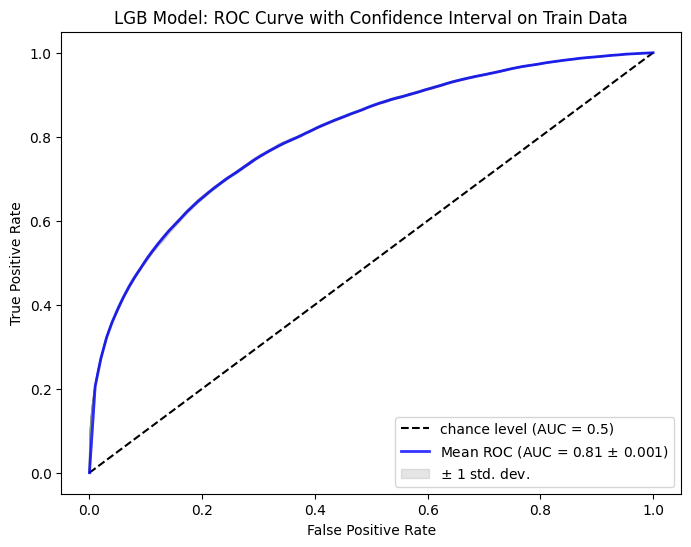

Mean AUROC: 80.51(80.4395, 80.5760)


In [35]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 6))

for i, (train_idx, test_idx) in enumerate(cv.split(X_resampled, y_resampled)):
    cv_train_X, cv_test_X = X_resampled[train_idx], X_resampled[test_idx]
    cv_train_y, cv_test_y = y_resampled[train_idx], y_resampled[test_idx]

    best_model = CatBoostClassifier(**best_params, random_state=42)

    # No need to resample again since you already have resampled data
    best_model.fit(cv_train_X, cv_train_y)
    prob_ada = best_model.predict_proba(cv_test_X)[:, 1]
    fpr, tpr, _ = roc_curve(cv_test_y, prob_ada)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, alpha=0.3, lw=1, label=f"Fold {i+1} AUC: {roc_auc:.4f}") # 여기서 label 추가
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)


ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.3f)" % (mean_auc, ci_auroc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="CatBoost Model: ROC Curve with Confidence Interval on Train Data",
)
ax.legend(loc="lower right")
plt.show()
print(f"Mean AUROC: {mean_auc*100:.2f}({(mean_auc-ci_auroc)*100:.4f}, {(mean_auc+ci_auroc)*100:.4f})")

In [37]:
print("제일 좋은 CatBoost 파라미터:", best_params)

제일 좋은 LGB 파라미터: {'depth': 3, 'eval_metric': 'AUC', 'iterations': 80, 'learning_rate': 0.2, 'loss_function': 'Logloss'}


In [38]:
from catboost import CatBoostClassifier
import os
import pickle

# 최적의 하이퍼파라미터로 모델 학습
best_model = CatBoostClassifier(**best_params, random_state=42)
best_model.fit(X_resampled, y_resampled)

# 원하는 저장 경로를 지정하세요. 예: 'C:/Users/username/models/'
fpath = 'C://Users//user//OneDrive - 경희대학교//바탕 화면//KSJ//machine learning//substance//pickles'
custom_path = fpath

# 경로에 해당하는 디렉토리가 없으면 생성
if not os.path.exists(custom_path):
    os.makedirs(custom_path)

# 원하는 경로에 학습된 모델을 피클 형식으로 저장
file_path = os.path.join(custom_path, "sub_finalized_model_catboost.pkl")
with open(file_path, "wb") as f:
    pickle.dump(best_model, f)

In [39]:
# 외부 데이터셋 불러오기 및 전처리
extra1_X = extra_validation1[data_cols]  # 외부 데이터셋에서 target 열 제거
extra1_y = extra_validation1[label_col]  # 외부 데이터셋의 target 열

In [40]:
# 외부 데이터셋 불러오기 및 전처리
extra2_X = extra_validation2[data_cols]  # 외부 데이터셋에서 target 열 제거
extra2_y = extra_validation2[label_col]  # 외부 데이터셋의 target 열

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 학습된 best_model을 사용하여 extra1_X에 대한 예측 수행
prob_extra1_catboost = best_model.predict_proba(extra1_X)[:, 1]

# AUROC 곡선 그리기
fpr, tpr, _ = roc_curve(extra1_y, prob_extra1_catboost)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 학습된 best_model을 사용하여 extra2_X에 대한 예측 수행
prob_extra2_catboost = best_model.predict_proba(extra2_X)[:, 1]

# AUROC 곡선 그리기
fpr, tpr, _ = roc_curve(extra2_y, prob_extra2_catboost)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

# 누락된 열을 NaN 값으로 추가
for col in data_cols:
    if col not in extra1_X.columns:
        extra1_X[col] = np.nan

# data_cols 순서대로 extra_X의 열을 정렬
extra1_X = extra1_X[data_cols]

# SimpleImputer 인스턴스 생성
imputer = SimpleImputer(strategy='mean')

# imputer를 train_data에 맞춤
imputer.fit(original_data[data_cols])

# extra_X 데이터셋 변환
extra1_X_imputed = imputer.transform(extra1_X)
prob_extra1_catboost = best_model.predict_proba(extra1_X_imputed)[:, 1]  # 여기서 extra1_X_imputed를 사용합니다.

# 변환된 데이터를 다시 DataFrame으로 변환
extra1_X_imputed = pd.DataFrame(extra1_X_imputed, columns=data_cols)

# 최적의 threshold 찾기
optimal_threshold1 = find_optimal_threshold(extra1_y, prob_extra1_catboost)

# 최적의 threshold를 사용하여 예측 수행
y_pred_extra1_opt = (prob_extra1_catboost >= optimal_threshold1).astype(int)
tn_opt1, fp_opt1, fn_opt1, tp_opt1 = confusion_matrix(extra1_y, y_pred_extra1_opt).ravel()
sensitivity_opt1 = tp_opt1 / (tp_opt1 + fn_opt1)
specificity_opt1 = tn_opt1 / (tn_opt1 + fp_opt1)
accuracy_opt1 = accuracy_score(extra1_y, y_pred_extra1_opt)
balanced_accuracy_opt1 = balanced_accuracy_score(extra1_y, y_pred_extra1_opt)
auroc_opt1 = roc_auc_score(extra1_y, prob_extra1_catboost)

# 최적의 threshold와 외부 데이터셋에 대한 성능 지표 출력
print(f"Optimal Threshold (EXTRA1): {optimal_threshold1:.4f}")
print(f"Sensitivity (EXTRA1): {sensitivity_opt1*100:.2f}")
print(f"Specificity (EXTRA1): {specificity_opt1*100:.2f}")
print(f"Accuracy (EXTRA1): {accuracy_opt1*100:.2f}")
print(f"Balanced Accuracy (EXTRA1): {balanced_accuracy_opt1*100:.2f}")
print(f"AUROC (EXTRA1): {auroc_opt1*100:.2f}")

In [ ]:
from sklearn.impute import SimpleImputer

# 누락된 열을 NaN 값으로 추가
for col in data_cols:
    if col not in extra2_X.columns:
        extra2_X[col] = np.nan

# data_cols 순서대로 extra_X의 열을 정렬
extra2_X = extra2_X[data_cols]

# SimpleImputer 인스턴스 생성
imputer = SimpleImputer(strategy='mean')

# imputer를 train_data에 맞춤(?)
imputer.fit(original_data[data_cols])

# extra_X 데이터셋 변환
extra2_X_imputed = imputer.transform(extra2_X)
prob_extra2_catboost = best_model.predict_proba(extra2_X_imputed)[:, 1]  # 여기서 extra2_X_imputed를 사용합니다.

# 변환된 데이터를 다시 DataFrame으로 변환
extra2_X_imputed = pd.DataFrame(extra2_X_imputed, columns=data_cols)

# 최적의 threshold 찾기
optimal_threshold2 = find_optimal_threshold(extra2_y, prob_extra2_catboost)

# 최적의 threshold를 사용하여 예측 수행
y_pred_extra2_opt = (prob_extra2_catboost >= optimal_threshold2).astype(int)
tn_opt2, fp_opt2, fn_opt2, tp_opt2 = confusion_matrix(extra2_y, y_pred_extra2_opt).ravel()
sensitivity_opt2 = tp_opt2 / (tp_opt2 + fn_opt2)
specificity_opt2 = tn_opt2 / (tn_opt2 + fp_opt2)
accuracy_opt2 = accuracy_score(extra2_y, y_pred_extra2_opt)
balanced_accuracy_opt2 = balanced_accuracy_score(extra2_y, y_pred_extra2_opt)
auroc_opt2 = roc_auc_score(extra2_y, prob_extra2_catboost)

# 최적의 threshold와 외부 데이터셋에 대한 성능 지표 출력
print(f"Optimal Threshold (EXTRA2): {optimal_threshold2:.4f}")
print(f"Sensitivity (EXTRA2): {sensitivity_opt2*100:.2f}")
print(f"Specificity (EXTRA2): {specificity_opt2*100:.2f}")
print(f"Accuracy (EXTRA2): {accuracy_opt2*100:.2f}")
print(f"Balanced Accuracy (EXTRA2): {balanced_accuracy_opt2*100:.2f}")
print(f"AUROC (EXTRA2): {auroc_opt2*100:.2f}")

Random forest Feature Importances:
                  Feature  Importance
8                 smoking   17.746390
3                   bmi_2   15.239567
4        household_income   12.626523
0                     SEX   11.539115
11        suicideattempts    7.741909
9              depression    6.700919
7   alcoholic_consumption    6.059013
1                   GRADE    5.898942
5                   study    5.471681
6                  stress    5.154307
10       suicidalthinking    5.018875
2                  region    0.802760


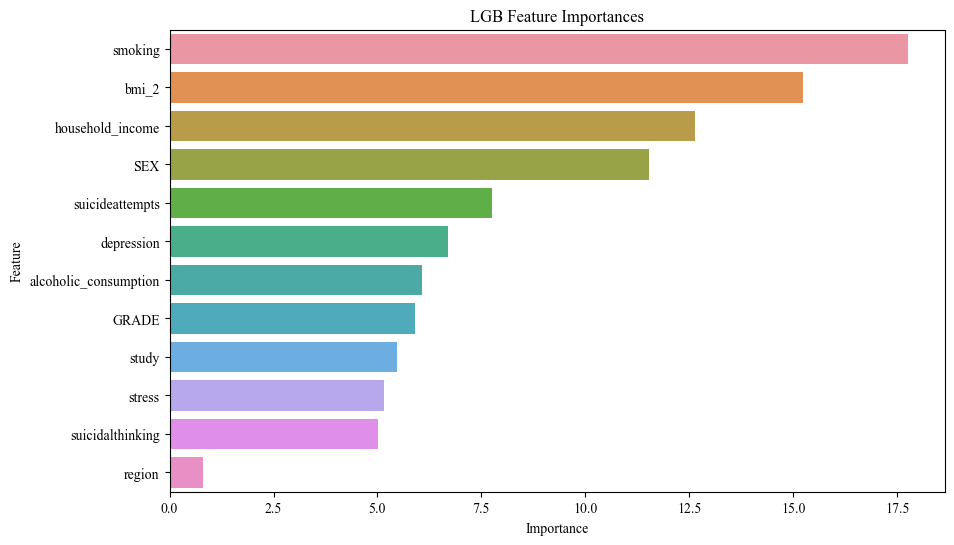

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances
catboost_feature_importances = best_model.feature_importances_

# Convert feature importances to a DataFrame
catboost_feature_importances_df = pd.DataFrame({"Feature": data_cols, "Importance": catboost_feature_importances})

# Sort feature importances in descending order
sorted_catboost_feature_importances = catboost_feature_importances_df.sort_values("Importance", ascending=False)

# Print feature importances
print("CatBoost Feature Importances:")
print(sorted_catboost_feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'
sns.barplot(data=sorted_catboost_feature_importances, x="Importance", y="Feature")
plt.title("CatBoost Feature Importances")
plt.show()